# Model Parameters Analysis

In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

plt.rcParams['figure.figsize']=[40,20]
plt.rcParams['font.size']=22
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

ModuleNotFoundError: No module named 'pandas'

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot

ModuleNotFoundError: No module named 'plotly'

## SARS

In [8]:
sars_7d = pd.read_csv("../results/SARS_7d_90_params.csv")
sars_14d = pd.read_csv("../results/SARS_14d_90_params.csv")
sars_21d = pd.read_csv("../results/SARS_21d_90_params.csv")
sars_117d = pd.read_csv("../results/SARS_117d_90_params.csv")

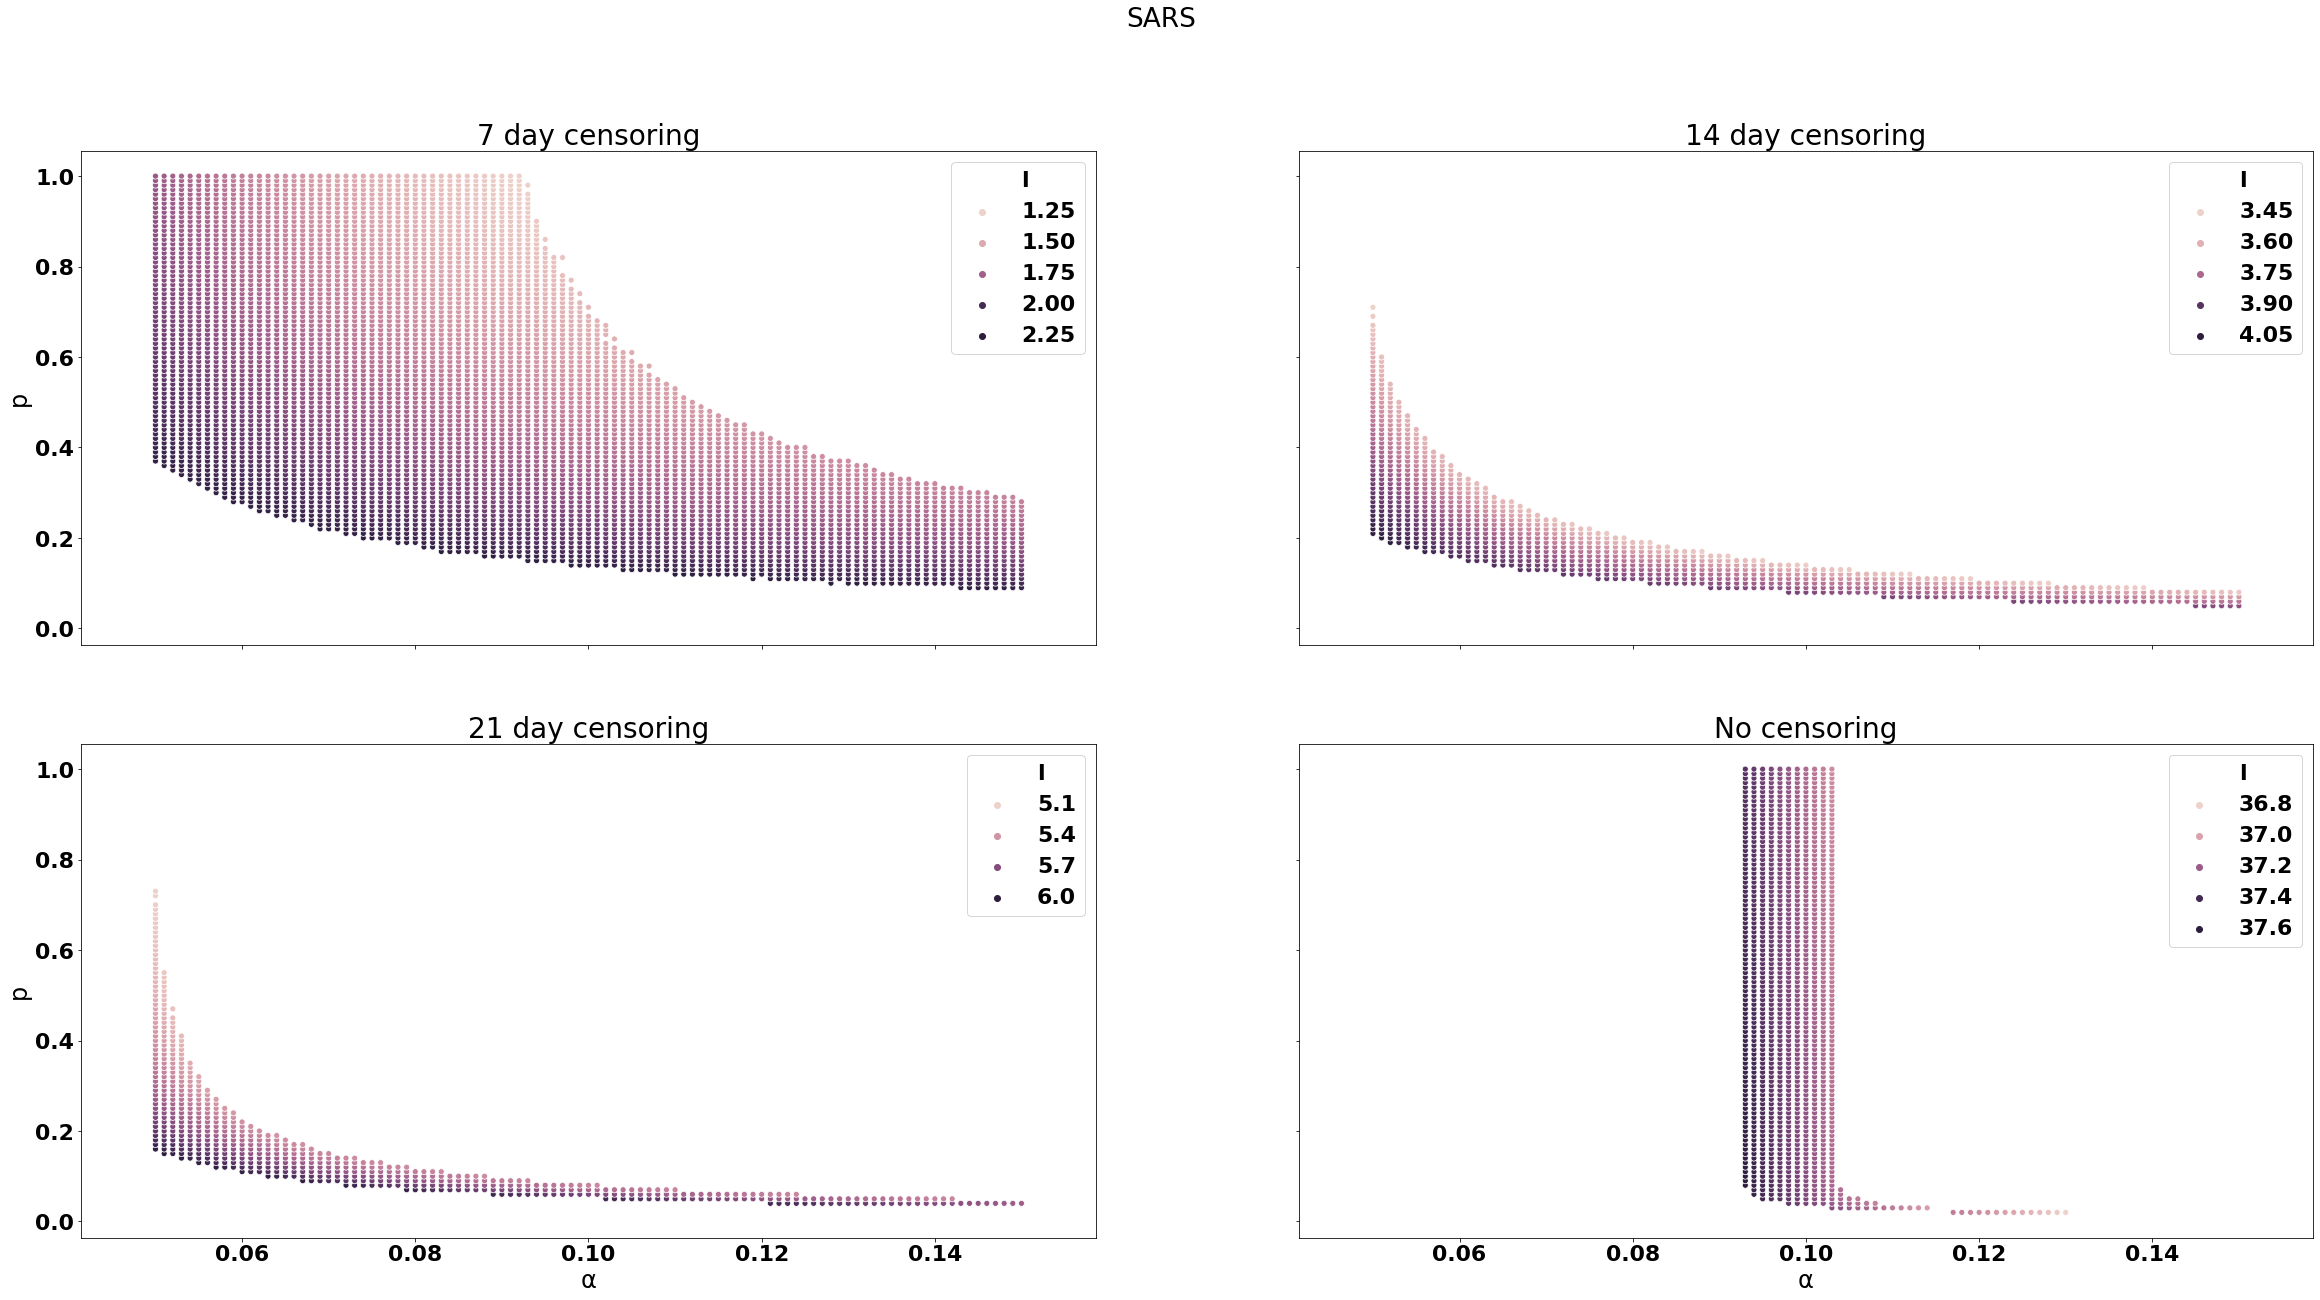

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("SARS")

ax[0][0].set_title("7 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_7d, ax=ax[0][0])

ax[0][1].set_title("14 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_14d, ax=ax[0][1])

ax[1][0].set_title("21 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_21d, ax=ax[1][0])

ax[1][1].set_title("No censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_117d, ax=ax[1][1])

# plt.savefig("../plots/SARS_params.pdf")

In [13]:
def generate_surface(df):
    z_data = df.pivot(index="α", columns="p", values="l").fillna(0)
    
    return go.Surface(z=z_data, x=z_data.index, y=z_data.columns, showscale=False)

In [79]:
def plot_surfaces(title, df_7d, df_14d, df_21d, df_nod):
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{'type': 'surface'}, {'type': 'surface'}],
               [{'type': 'surface'}, {'type': 'surface'}]],
        subplot_titles=["7 day", "14 day", "21 day", "No censoring"]
    )

    fig.add_trace(generate_surface(df_7d), row=1, col=1)
    fig.add_trace(generate_surface(df_14d), row=1, col=2)
    fig.add_trace(generate_surface(df_21d), row=2, col=1)
    fig.add_trace(generate_surface(df_nod), row=2, col=2)
    
    fig.update_layout(title=title, autosize=True, width=1000, height=1000, 
                      scene1 = dict(xaxis_title='α', yaxis_title='p', zaxis_title='likelihood'),
                      scene2 = dict(xaxis_title='α', yaxis_title='p', zaxis_title='likelihood'),
                      scene3 = dict(xaxis_title='α', yaxis_title='p', zaxis_title='likelihood'),
                      scene4 = dict(xaxis_title='α', yaxis_title='p', zaxis_title='likelihood'),
                     )

    plot(fig, filename=f"../plots/{title}_3d_surface.html")

In [80]:
plot_surfaces("SARS", sars_7d, sars_14d, sars_21d, sars_117d)

## MERS

In [64]:
mers_first_7d = pd.read_csv("../results/MERS_first_7d_90_params.csv")
mers_first_14d = pd.read_csv("../results/MERS_first_14d_90_params.csv")
mers_first_21d = pd.read_csv("../results/MERS_first_21d_90_params.csv")
mers_first_402d = pd.read_csv("../results/MERS_first_402d_90_params.csv")

In [70]:
plot_surfaces("MERS (1st)", mers_first_7d, mers_first_14d, mers_first_21d, mers_first_402d)

In [27]:
mers_second_7d = pd.read_csv("../results/MERS_second_7d_90_params.csv")
mers_second_14d = pd.read_csv("../results/MERS_second_14d_90_params.csv")
mers_second_21d = pd.read_csv("../results/MERS_second_21d_90_params.csv")
mers_second_436d = pd.read_csv("../results/MERS_second_436d_90_params.csv")

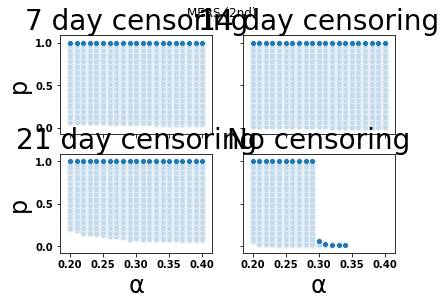

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("MERS (2nd)")

ax[0][0].set_title("7 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_7d, ax=ax[0][0])

ax[0][1].set_title("14 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_14d, ax=ax[0][1])

ax[1][0].set_title("21 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_21d, ax=ax[1][0])

ax[1][1].set_title("No censoring")
sns.scatterplot(x='α', y='p', data=mers_second_436d, ax=ax[1][1])

plt.savefig("../plots/MERS_second_params.pdf")

## Coronavirus

In [81]:
coronavirus_7d = pd.read_csv("../results/Coronavirus_7d_90_params.csv")
coronavirus_14d = pd.read_csv("../results/Coronavirus_14d_90_params.csv")
coronavirus_21d = pd.read_csv("../results/Coronavirus_21d_90_params.csv")
coronavirus_29d = pd.read_csv("../results/Coronavirus_29d_90_params.csv")

In [82]:
plot_surfaces("Coronavirus", coronavirus_7d, coronavirus_14d, coronavirus_21d, coronavirus_29d)

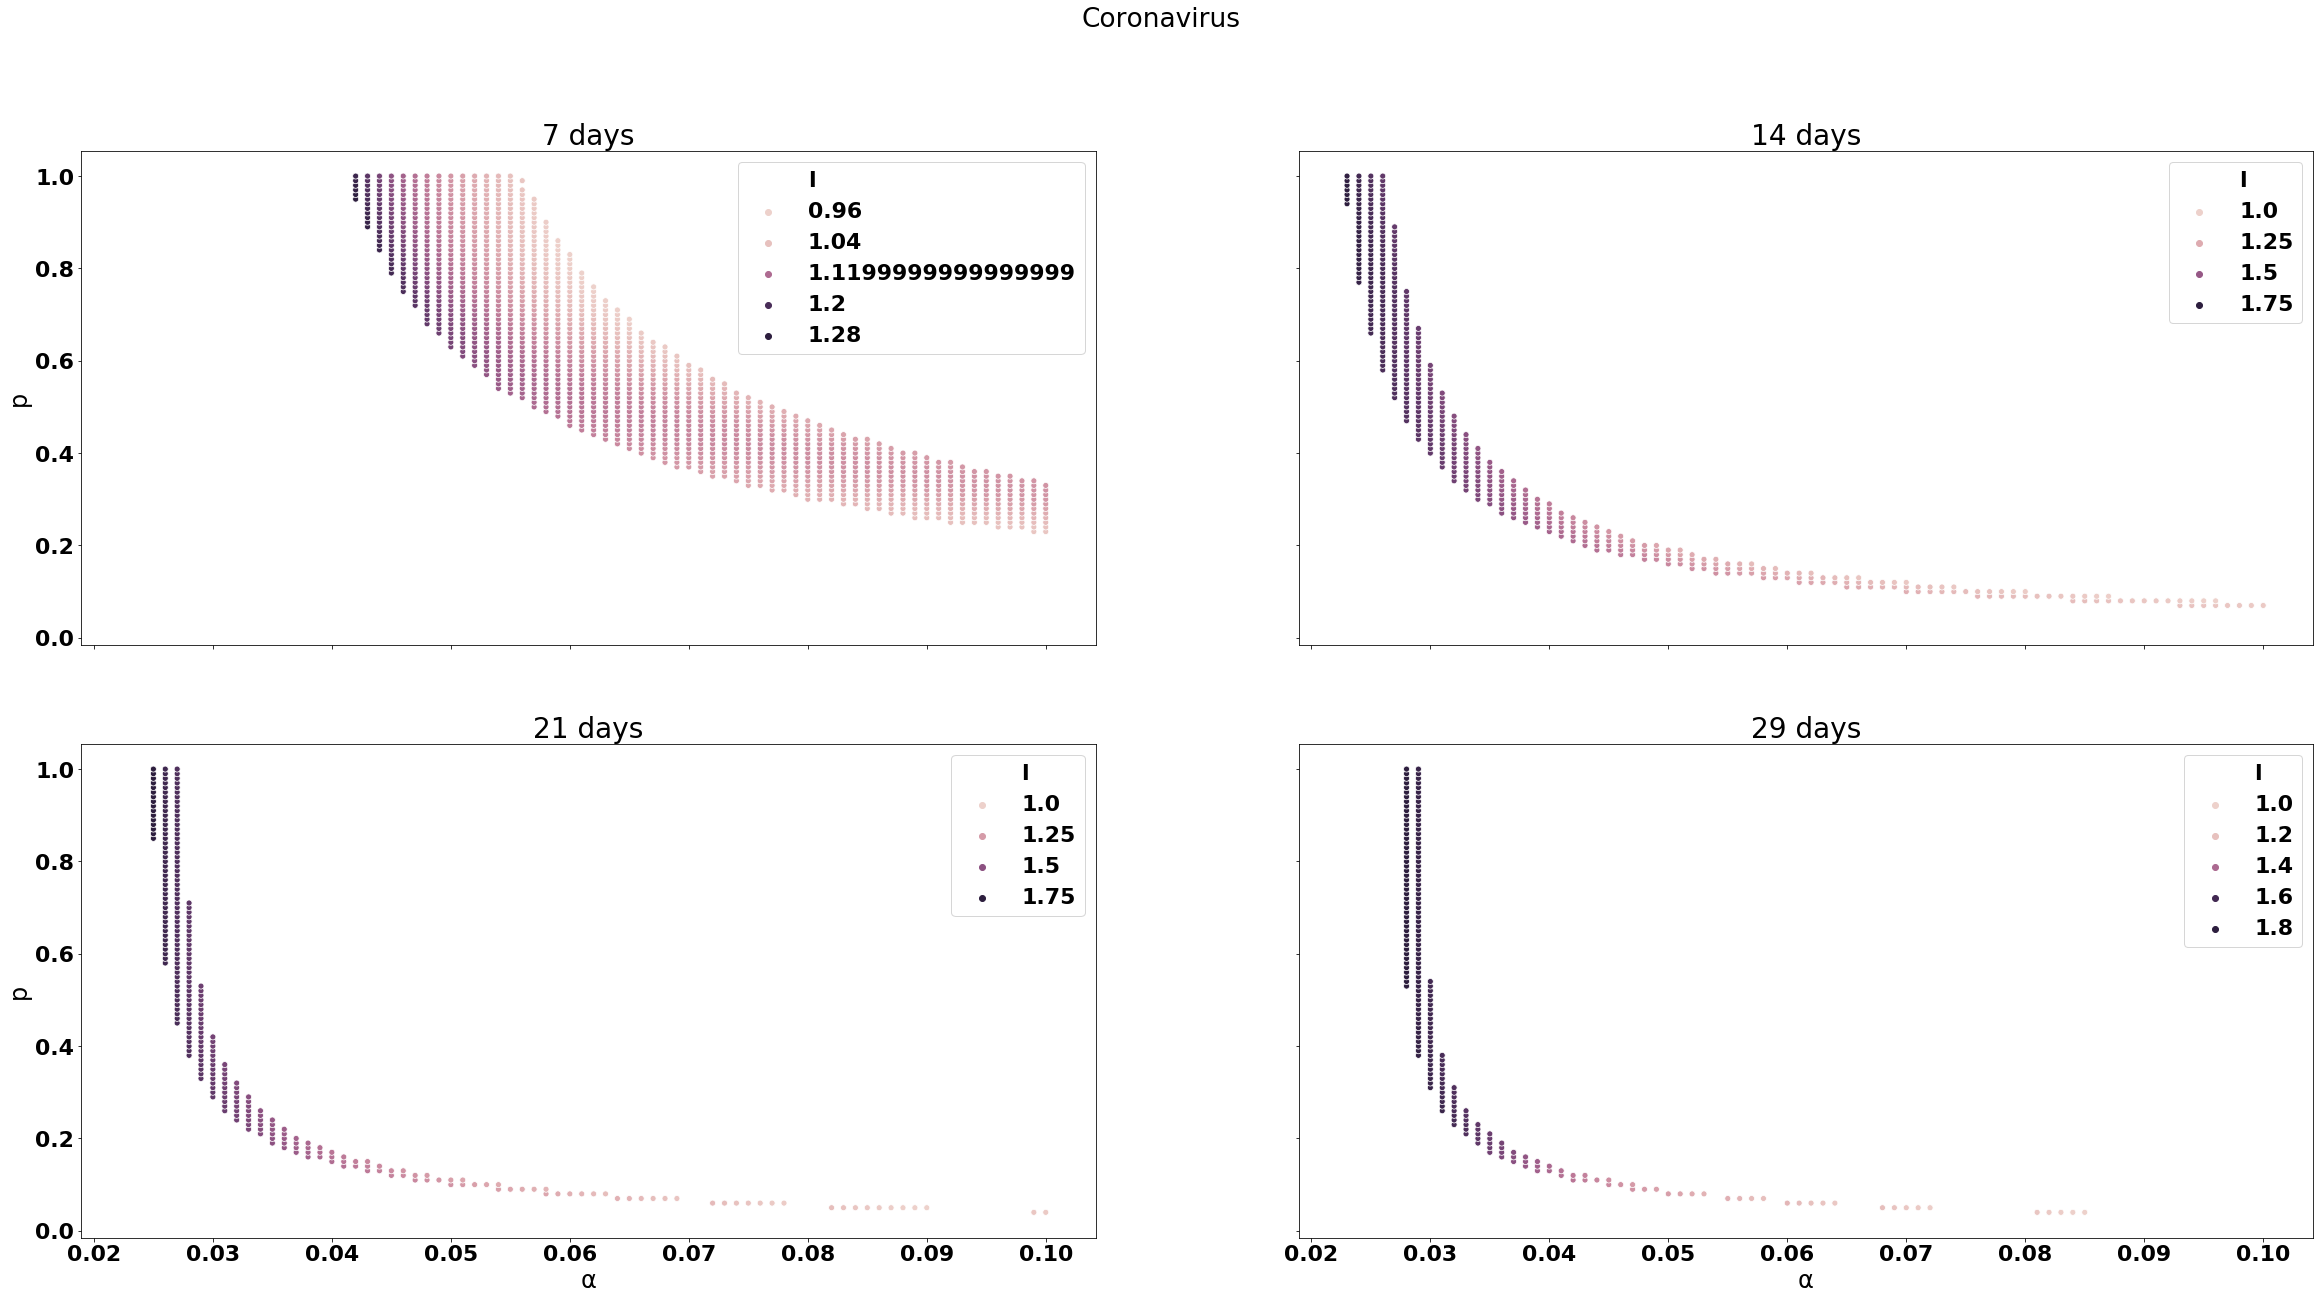

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("Coronavirus")

ax[0][0].set_title("7 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_7d, ax=ax[0][0])

ax[0][1].set_title("14 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_14d, ax=ax[0][1])

ax[1][0].set_title("21 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_21d, ax=ax[1][0])

ax[1][1].set_title("29 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_29d, ax=ax[1][1])

plt.savefig("../plots/Coronavirus_params.pdf")

## Mean Distance FFX

In [1]:
SARS_100FFX = pd.read_csv("../results/minimax/SARS_100FFX_20_mean_params.csv")

NameError: name 'pd' is not defined

In [17]:
def generate_surface(df):
    z_data = df.pivot(index="α", columns="p", values="d").fillna(0)
    
    return go.Surface(z=z_data, x=z_data.index, y=z_data.columns, showscale=False)

In [34]:
fig = go.Figure(data=[generate_surface(SARS_20)])

fig.update_layout(title='SARS', autosize=False, width=1000, height=1000,
                  xaxis = dict(nticks=10, range=[0, 0.15],),
                  yaxis = dict(nticks=10, range=[0, 0.3],),
                  scene=dict(xaxis_title='α', yaxis_title='p', zaxis_title='distance'))

plot(fig, filename=f"../plots/SARS_minimax_3d_surface.html")

'../plots/SARS_minimax_3d_surface.html'